In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from ift6758.features.feature_ingenering import *

In [43]:
df_clean = clean_dataframe(2016, 2020)

INFO: Chargement des saisons 2016-2020...


Chargement des saisons 2016-2020...
Chargement du CSV existant: /Users/qili/Library/CloudStorage/OneDrive-SanteetServicessociaux/Soins intensifs/Érudition/Recherche/MSc MedComp/IFT6758 Sciences des données/project-datascience-python/notebooks/../data/raw/20162017.csv
20162017: 12989 événements
Chargement du CSV existant: /Users/qili/Library/CloudStorage/OneDrive-SanteetServicessociaux/Soins intensifs/Érudition/Recherche/MSc MedComp/IFT6758 Sciences des données/project-datascience-python/notebooks/../data/raw/20172018.csv


INFO: Tri des événements par match et période...
INFO: Calcul des features d'événement précédent...


20172018: 358614 événements
Chargement du CSV existant: /Users/qili/Library/CloudStorage/OneDrive-SanteetServicessociaux/Soins intensifs/Érudition/Recherche/MSc MedComp/IFT6758 Sciences des données/project-datascience-python/notebooks/../data/raw/20182019.csv
20182019: 13111 événements
Chargement du CSV existant: /Users/qili/Library/CloudStorage/OneDrive-SanteetServicessociaux/Soins intensifs/Érudition/Recherche/MSc MedComp/IFT6758 Sciences des données/project-datascience-python/notebooks/../data/raw/20192020.csv
20192020: 13208 événements
Total: 397922 événements


INFO: Filtrage des tirs et buts...
INFO:   96533 tirs/buts retenus (9156 buts)
INFO: Calcul de distance_net et angle_net...
INFO: Calcul de game_seconds...
INFO: Calcul des features de rebond...
INFO: Calcul de shot_speed et distance_prev_event...
INFO: Calcul des features de power-play (BONUS)...


Chargement de /Users/qili/Library/CloudStorage/OneDrive-SanteetServicessociaux/Soins intensifs/Érudition/Recherche/MSc MedComp/IFT6758 Sciences des données/project-datascience-python/notebooks/../data/raw/20162017.json...
Chargement de /Users/qili/Library/CloudStorage/OneDrive-SanteetServicessociaux/Soins intensifs/Érudition/Recherche/MSc MedComp/IFT6758 Sciences des données/project-datascience-python/notebooks/../data/raw/20172018.json...
Chargement de /Users/qili/Library/CloudStorage/OneDrive-SanteetServicessociaux/Soins intensifs/Érudition/Recherche/MSc MedComp/IFT6758 Sciences des données/project-datascience-python/notebooks/../data/raw/20182019.json...
Chargement de /Users/qili/Library/CloudStorage/OneDrive-SanteetServicessociaux/Soins intensifs/Érudition/Recherche/MSc MedComp/IFT6758 Sciences des données/project-datascience-python/notebooks/../data/raw/20192020.json...


INFO: Sélection des features finales...
INFO: DataFrame nettoyé: 96533 tirs, 24 features
INFO:   Features ajoutées: prev_xCoord, prev_yCoord, delta_t


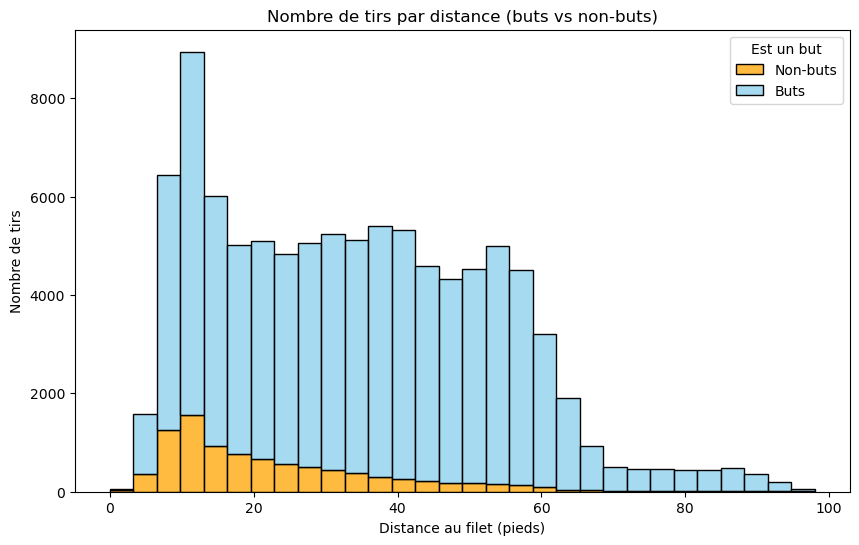

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df_clean,
    x="distance_net",
    hue="is_goal",
    bins=30,
    kde=False,
    multiple="stack",
    palette={0: "skyblue", 1: "orange"}
)
plt.title("Nombre de tirs par distance (buts vs non-buts)")
plt.xlabel("Distance au filet (pieds)")
plt.ylabel("Nombre de tirs")
plt.legend(title="Est un but", labels=["Non-buts", "Buts"])
plt.show()

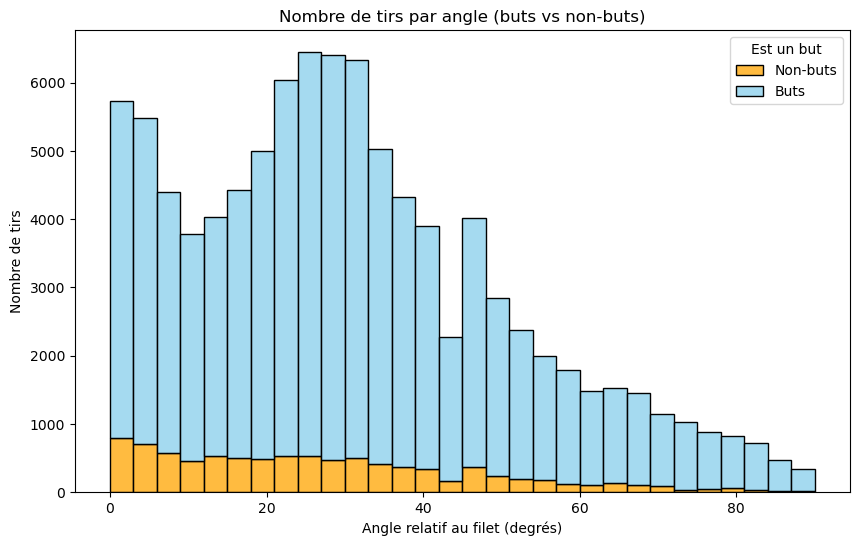

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df_clean,
    x="angle_net",
    hue="is_goal",
    bins=30,
    kde=False,
    multiple="stack",
    palette={0: "skyblue", 1: "orange"}
)
plt.title("Nombre de tirs par angle (buts vs non-buts)")
plt.xlabel("Angle relatif au filet (degrés)")
plt.ylabel("Nombre de tirs")
plt.legend(title="Est un but", labels=["Non-buts", "Buts"])
plt.show()

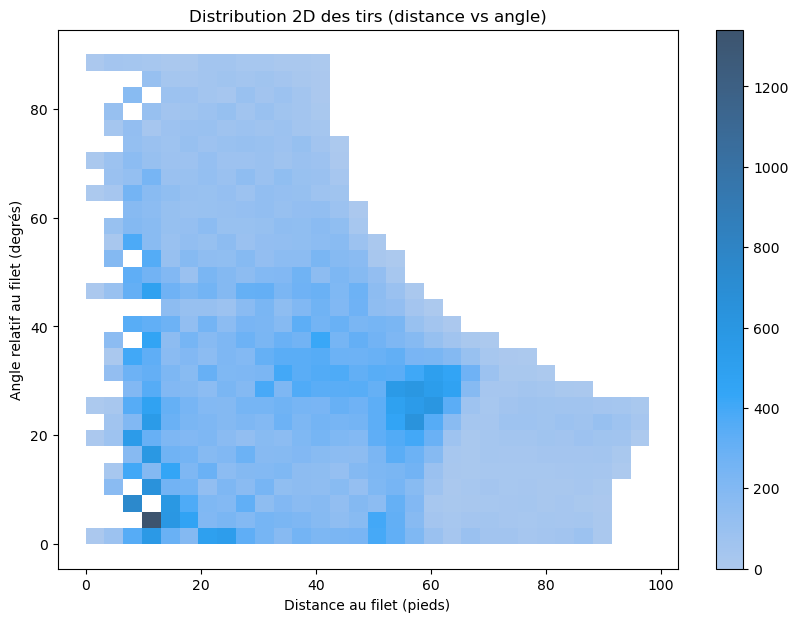

In [12]:
plt.figure(figsize=(10,7))
sns.histplot(
    data=df_clean,
    x="distance_net",
    y="angle_net",
    bins=30,
    cbar=True
)
plt.title("Distribution 2D des tirs (distance vs angle)")
plt.xlabel("Distance au filet (pieds)")
plt.ylabel("Angle relatif au filet (degrés)")
plt.show()

INFO: Génération des graphiques de taux de but...


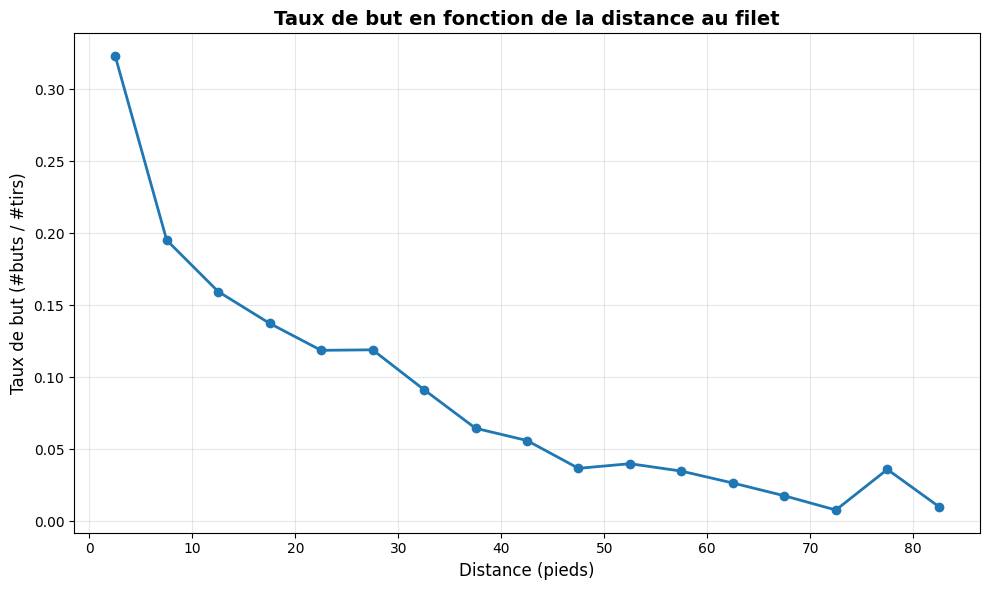

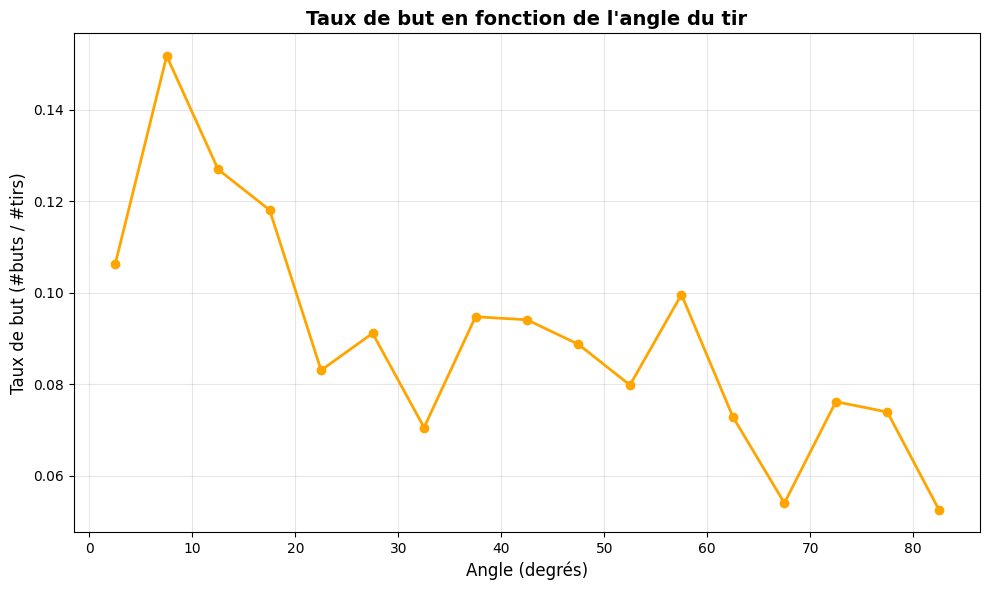

In [7]:
figure_ratio_but_nonbut(df_clean)

In [47]:
def plot_goal_distance_histograms(df_clean):
    """
    Plot histograms of goal distances:
    - Empty-net goals
    - Non–empty-net goals
    
    Helps identify potential incorrect events (bad x/y coordinates, impossible distances).
    """

    # Filter goals only
    goals = df_clean[df_clean["is_goal"] == 1].copy()

    # Split by empty net
    empty_goals = goals[goals["empty_net"] == 1]
    regular_goals = goals[goals["empty_net"] == 0]

    plt.figure(figsize=(12, 6))

    # Histogram bins (0 to ~100 ft)
    bins = np.arange(0, 110, 5)

    plt.hist(
        regular_goals["distance_net"],
        bins=bins,
        alpha=0.7,
        label="Regular goals (non empty net)",
        edgecolor="black"
    )

    plt.hist(
        empty_goals["distance_net"],
        bins=bins,
        alpha=0.7,
        label="Empty-net goals",
        edgecolor="black"
    )

    plt.title("Distribution of Goal Distances\nEmpty Net vs Normal Goals",
              fontsize=14, fontweight="bold")
    plt.xlabel("Distance from net (feet)", fontsize=12)
    plt.ylabel("Number of goals", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Optional: print counts for debugging
    print(f"Total goals: {len(goals)}")
    print(f"Regular goals: {len(regular_goals)}")
    print(f"Empty-net goals: {len(empty_goals)}")

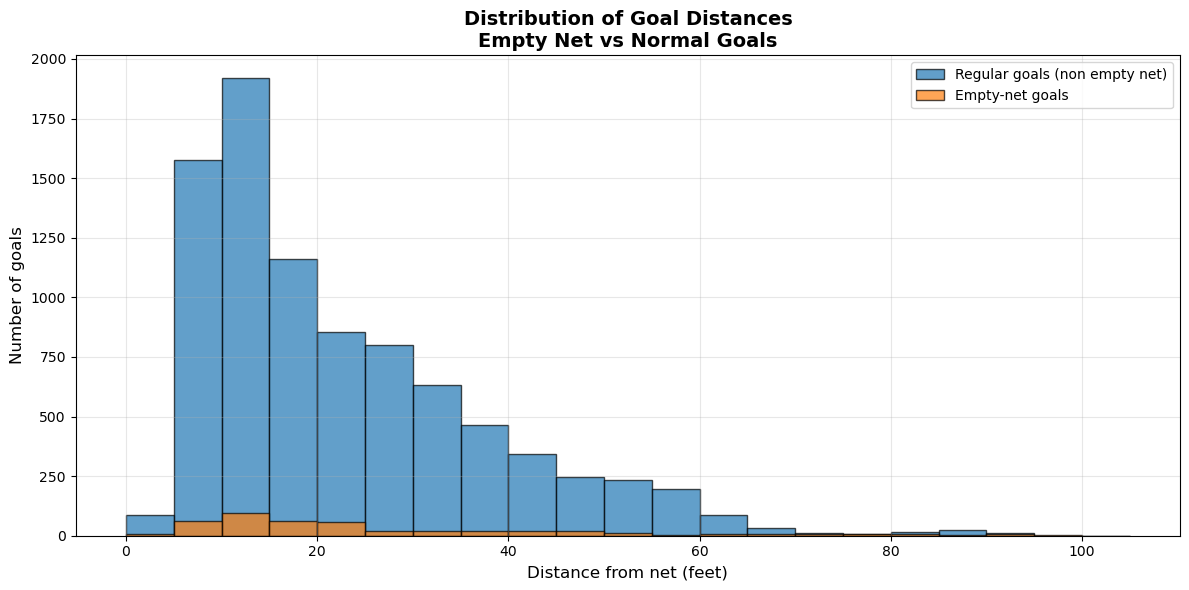

Total goals: 9156
Regular goals: 8703
Empty-net goals: 453


In [48]:
plot_goal_distance_histograms(df_clean)

In [44]:
print(df_clean.columns)
df_clean.head(20)

Index(['xCoord', 'yCoord', 'distance_net', 'angle_net', 'is_goal', 'empty_net',
       'game_seconds', 'game_period', 'shot_type', 'prev_xCoord',
       'prev_yCoord', 'delta_t', 'is_rebound', 'change_in_angle', 'shot_speed',
       'distance_prev_event', 'time_since_powerplay_start', 'friendly_skaters',
       'opponent_skaters', 'season', 'teamAbbr', 'idGame', 'prev_event',
       'prev_team'],
      dtype='object')


,xCoord,yCoord,distance_net,angle_net,is_goal,empty_net,game_seconds,game_period,shot_type,prev_xCoord,...,shot_speed,distance_prev_event,time_since_powerplay_start,friendly_skaters,opponent_skaters,season,teamAbbr,idGame,prev_event,prev_team
5,-77.0,5.0,13.000000,22.619865,0,0,71,1,wrist,-61.0,...,17.088007,17.088007,0.0,5,5,20162017,TOR,2016020001,blocked-shot,TOR
12,86.0,13.0,13.341664,77.005383,0,0,173,1,wrist,54.0,...,7.343024,36.715120,0.0,5,5,20162017,OTT,2016020001,giveaway,TOR
18,23.0,-38.0,76.157731,29.931512,0,0,241,1,wrist,-72.0,...,5.684341,102.318131,0.0,5,5,20162017,OTT,2016020001,missed-shot,TOR
20,33.0,-15.0,57.974132,14.995079,0,0,286,1,slap,77.0,...,2.414752,45.880279,0.0,5,5,20162017,OTT,2016020001,missed-shot,OTT
30,-34.0,28.0,61.717096,26.980231,0,0,406,1,wrist,47.0,...,5.076370,81.221918,0.0,5,5,20162017,TOR,2016020001,hit,TOR
32,-33.0,-17.0,58.523500,16.886791,0,0,450,1,wrist,-35.0,...,2.088767,48.041649,0.0,5,5,20162017,TOR,2016020001,giveaway,TOR
35,-70.0,1.0,19.026298,3.012788,1,0,501,1,wrist,-85.0,...,5.830952,17.492856,0.0,5,5,20162017,TOR,2016020001,missed-shot,TOR
37,-45.0,-36.0,56.850682,39.289407,0,0,509,1,wrist,0.0,...,7.203515,57.628118,0.0,5,5,20162017,TOR,2016020001,faceoff,TOR
39,33.0,-18.0,58.821765,17.818889,0,0,540,1,slap,-68.0,...,3.368151,101.044545,0.0,5,5,20162017,OTT,2016020001,faceoff,OTT
47,34.0,20.0,58.523500,19.983107,0,0,616,1,wrist,69.0,...,7.011419,35.057096,0.0,5,5,20162017,OTT,2016020001,faceoff,OTT


In [45]:
raw = pd.read_csv("../data/raw/20172018.csv")
raw[['situationCode', 'friendly_goalie', 'opponent_goalie']].head(20)

,situationCode,friendly_goalie,opponent_goalie
0,1551.0,1,1
1,1551.0,1,1
2,1551.0,1,1
3,1551.0,1,1
4,1551.0,1,1
5,1551.0,1,1
6,1551.0,1,1
7,1551.0,1,1
8,1551.0,1,1
9,1551.0,1,1


In [46]:
print(df_clean[["is_goal","empty_net"]].value_counts())

is_goal  empty_net
0        0            86392
1        0             8703
0        1              985
1        1              453
Name: count, dtype: int64
